In [ ]:
from scipy.io import arff
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Загружаем датасет людей с диабетом
data = arff.loadarff('/content/dataset_37_diabetes.arff')
df = pd.DataFrame(data[0])

In [ ]:
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,b'tested_negative'
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,b'tested_negative'
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,b'tested_negative'
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,b'tested_positive'


Значения показателей  

preg - Number of times pregnant  
plas - Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
pres - Diastolic blood pressure (mm Hg)  
skin - Triceps skin fold thickness (mm)  
insu - 2-Hour serum insulin (mu U/ml)  
mass - Body mass index (weight in kg/(height in m)^2)  
pedi - Diabetes pedigree function  
age - Age (years)  
class - Class variable (0 or 1)  

In [ ]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Выборка составляет людей возрастом с 21 по 81 год, средний возраст - 33 года  
В датасете среднее количество беременностей составляет почти 4 раза, причем большинство близится к 6

<Axes: xlabel='age', ylabel='Count'>

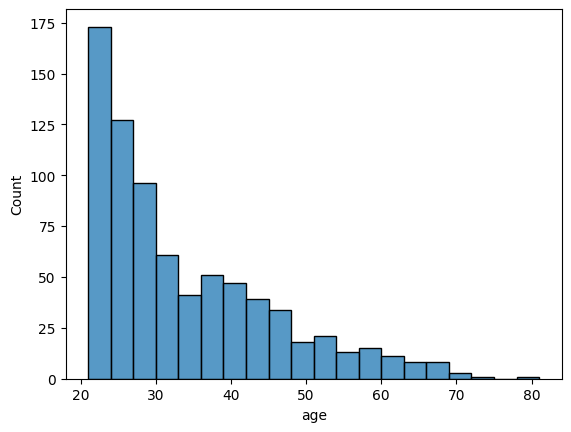

In [ ]:
sns.histplot(data=df, # какой датафрейм используем
            x='age', # какую переменную отрисовываем
            bins = 20)

In [ ]:
df.info() # смотрим на наши фичи

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   insu    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    object 
dtypes: float64(8), object(1)
memory usage: 54.1+ KB


Среди фичей, категориальная одна и единственная - class, обозначающая, есть ли диабет у человека

Разделяем числовые и категориальные фичи

In [ ]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

categorical columns:	  ['class'] 
 len =  1
numerical columns:	  ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'] 
 len =  8


Корреляция признаков

In [ ]:
df[num_columns].corr().style.background_gradient(cmap = 'YlOrRd', # наш цветовой стиль
                                    vmin = -1, # указываем нижний диапазон
                                    vmax=1) # указываем верхний  диапазон

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


Наибольшая линейная зависимость наблюдается у показателей 'age' и 'preg', что в принципе логично

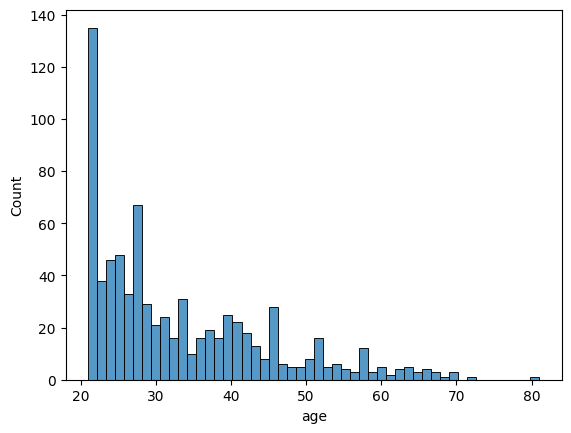

In [ ]:
sns.histplot(data=df, x='age', bins = 50);

В выборке большинство людей младше 30 лет

<Axes: xlabel='age', ylabel='insu'>

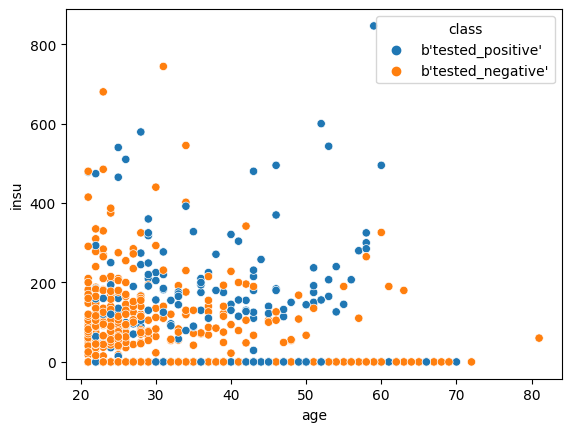

In [ ]:
sns.scatterplot(data=df, x='age', y='insu', hue='class')

С возрастом, наблюдается увеличение инсулина в крови, а также вероятность диагностировать диабет

In [ ]:
df.groupby('class')['age','insu','preg','mass'].mean().reset_index()

,class,age,insu,preg,mass
0,b'tested_negative',31.190000,68.792000,3.298000,30.304200
1,b'tested_positive',37.067164,100.335821,4.865672,35.142537


Таблица сверху показывает, что люди с диабетом в среднем старше, у них в с реднем больше инсулина, а также случаев беременности, и в целом они полнее

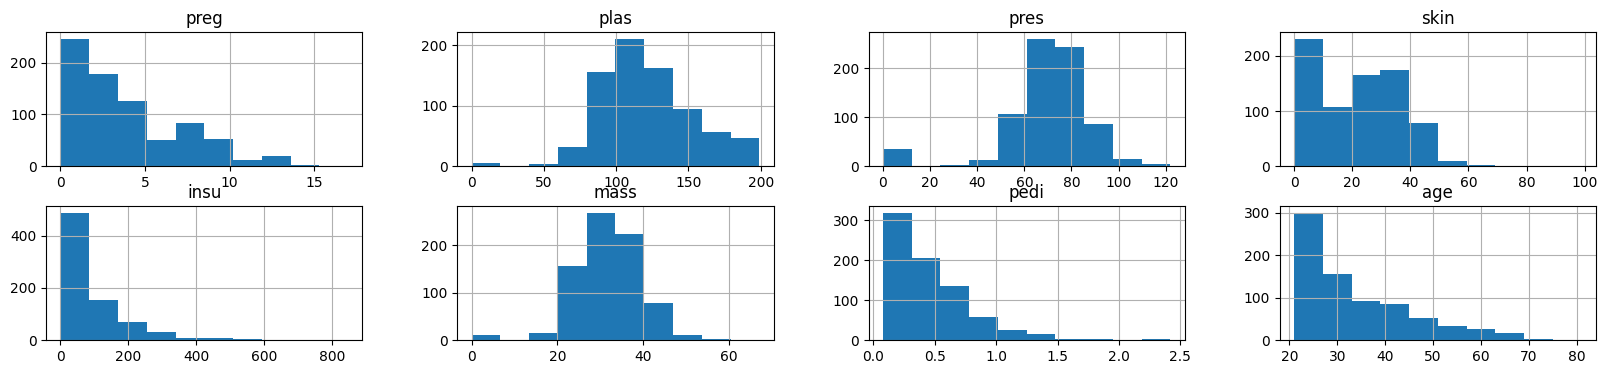

In [ ]:
fig, axs = plt.subplots(2,4,figsize=(20,  4))# создаем "полотно", на котором будем "рисовать" графики

df.hist(column = num_columns, ax = axs );

Графики фичей insu, skin, age, pedi и preg выглядят не "нормально"

In [ ]:
scale = StandardScaler()

scale.fit(df[num_columns]);

Можно посмотреть на среднее и ско

In [ ]:
scale.mean_, scale.scale_

(array([  3.84505208, 120.89453125,  69.10546875,  20.53645833,
         79.79947917,  31.99257812,   0.4718763 ,  33.24088542]),
 array([  3.36738361,  31.95179591,  19.34320163,  15.94182863,
        115.16894926,   7.87902573,   0.33111282,  11.75257265]))

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
scaled = scale.transform(df[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


Визуализируем

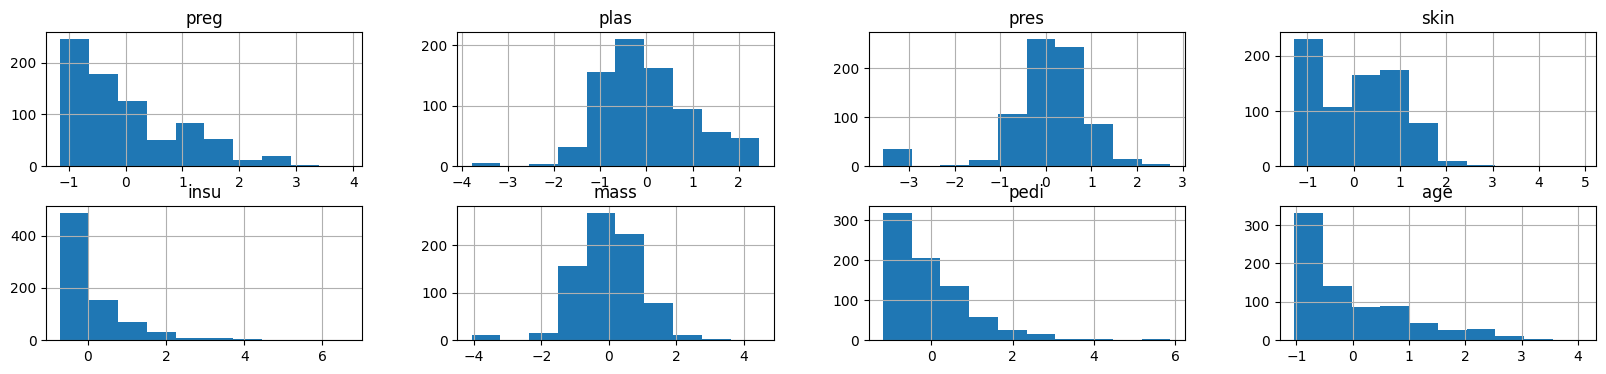

In [ ]:
df_standard.hist(figsize = (20,4), layout= (2,4));

### **Первый шаг**

создаем объект `MinMaxScaler()` и "обучаем" его `.fit`

Где мы сохраняем максимальное (`data_max_`) и минимальное (`data_min_`) исходного набора данных

Это полезно, так как вы можете использовать те же значения для других данных в будущем

In [ ]:
norm = MinMaxScaler()

norm.fit(df[num_columns]);

Можно посмотреть на максимальное и минимальное значения для каждого из принаков

In [ ]:
norm.data_max_, norm.data_min_

(array([ 17.  , 199.  , 122.  ,  99.  , 846.  ,  67.1 ,   2.42,  81.  ]),
 array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.078, 21.   ]))

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
normalized = norm.transform(df[num_columns])
df_norm = pd.DataFrame(normalized, columns= num_columns)
df_norm

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


Визуализируем

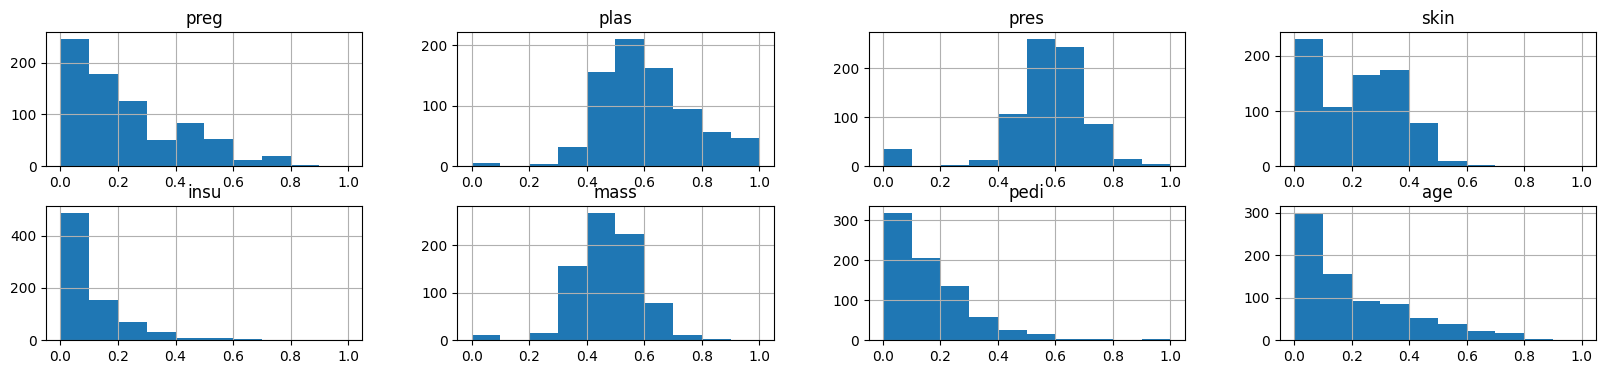

In [ ]:
df_norm.hist(figsize = (20,4), layout= (2,4));

## Степенное преобразование

### **Первый шаг**

Создание Объекта `PowerTransformer()` и его "обучение" `.fit`


In [ ]:
pt = PowerTransformer()

pt.fit(df[num_columns]);

Коэффициенты степени преобразования

In [ ]:
pt.lambdas_

array([ 0.17272363,  0.96640477,  1.60663147,  0.51156636, -0.03228486,
        1.27656634, -2.25038684, -1.14960183])

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
power = pt.transform(df[num_columns])
df_power = pd.DataFrame(power, columns= num_columns)
df_power

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.813399,0.848665,0.068935,0.876707,-1.008294,0.174124,0.821764,1.364180
1,-0.833906,-1.123027,-0.306484,0.632185,-1.008294,-0.725726,-0.168409,0.126452
2,1.188996,1.930906,-0.427244,-1.430072,-1.008294,-1.129341,0.935284,0.230161
3,-0.833906,-0.996671,-0.306484,0.362347,0.859700,-0.537700,-1.298725,-1.480075
4,-1.603317,0.506848,-1.693204,0.876707,1.077013,1.477376,2.336680,0.327328
...,...,...,...,...,...,...,...,...
763,1.500834,-0.618705,0.329924,1.345791,1.102624,0.081666,-1.267837,1.765331
764,-0.339229,0.039240,-0.058370,0.545442,-1.008294,0.603281,-0.222191,-0.368619
765,0.590955,0.008000,0.068935,0.362347,0.925586,-0.775397,-0.753116,0.015535
766,-0.833906,0.164114,-0.662035,-1.430072,-1.008294,-0.282815,-0.178081,1.238144


Визуализируем

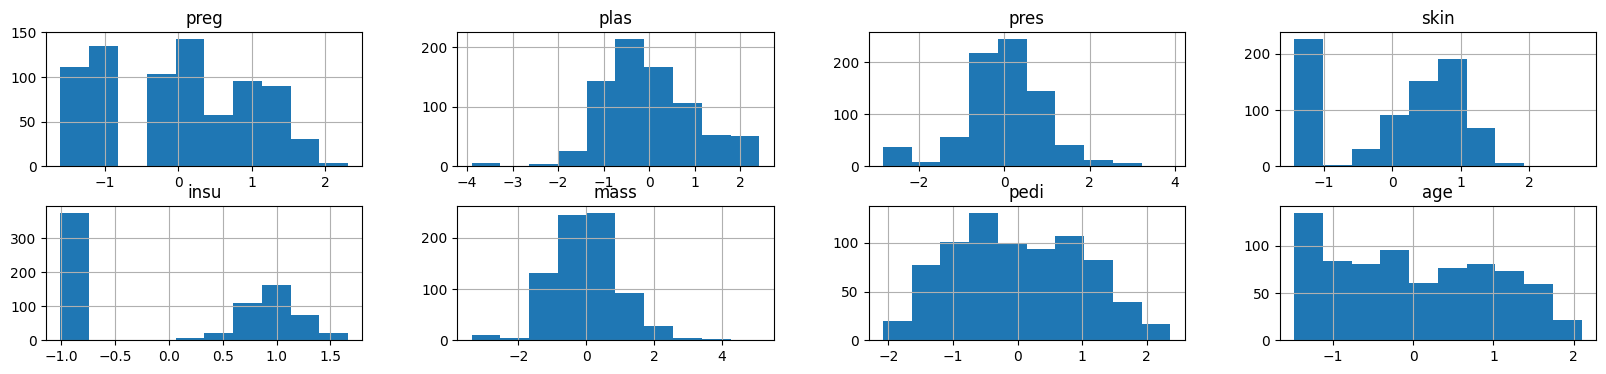

In [ ]:
df_power.hist(figsize = (20,4), layout= (2,4));

## Давайте создадим заменятель редких значений

Посмотрим на статистику числовых признаков

In [ ]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Эта реализация определяет класс `QuantileReplacer`, который наследуется от классов `BaseEstimator` и `TransformerMixin` из scikit-learn. Класс принимает параметр `threshold`, который определяет относительное пороговое значение для идентификации редких числовых значений.

Метод `fit` вычисляет нижний и верхний квантили для каждого числового признака во входном фрейме данных pandas и сохраняет их в словаре.

Метод `transform` заменяет редкие числовые значения значениями, основанными на квантилях, хранящихся в словаре.

Если редкое значение выше, чем среднее значение нижнего и верхнего квантилей, оно заменяется значением высокого квантиля. В противном случае оно заменяется значением нижнего квантиля.

In [ ]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

Применение - стандартная рутина

* Создаем объект класса
* "Обучаем" через `.fit`
* Применяем через `.transform`

In [ ]:
qr = QuantileReplacer(threshold=0.01, )

qr.fit(df[num_columns])

DF_num_rare = qr.transform(df[num_columns])

Посмотрим на новую статистику числовых признаков

In [ ]:
DF_num_rare.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,120.186198,69.053385,20.433125,78.604427,31.936031,0.485166,33.205729
std,3.336808,30.603158,19.243340,15.646206,109.425722,7.712781,0.336407,11.645318
min,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.096000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.247000,24.000000
50%,3.000000,116.000000,72.000000,23.000000,30.500000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,127.250000,36.600000,0.641250,41.000000
max,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000


# Предварительная обработка категориальных признаков

## Порядковое кодирование

### **Первый шаг**

Создание Объекта `OrdinalEncoder()` и его "обучение" `.fit`

In [ ]:
ordinal = OrdinalEncoder()
ordinal.fit(df[cat_columns]);

Можно посмотреть на какие категории что значат

In [ ]:
ordinal.categories_

[array([b'tested_negative', b'tested_positive'], dtype=object)]

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
Ordinal_encoded = ordinal.transform(df[cat_columns])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns)
df_ordinal

,class
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
763,0.0
764,0.0
765,0.0
766,1.0


## Напишем заменятель редких категориальных данных

посмотрим на число повторений результата в каждом категориальном признаке

In [ ]:
df[cat_columns].nunique()

class    2
dtype: int64

Класс `RareGrouper` наследуется от классов `BaseEstimator` и `TransformerMixin` из sklearn.

Метод `fit` вычисляет относительную частоту категориальных признаков во входном DataFrame и сохраняет их в словаре.

Метод `transform` заменяет редкие категориальные признаки на строку `other_value`, указанную во время инициализации.

In [ ]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

Применение - стандартная рутина

* Создаем объект класса
* "Обучаем" через `.fit`
* Применяем через `.transform`

В этой реализации мы объединили обучение и применение через метод `.fit_transform`

In [ ]:
rg = RareGrouper(threshold=0.001, other_value='rare')
DF_cat_rare = rg.fit_transform(df[cat_columns])
DF_cat_rare

,class
0,b'tested_positive'
1,b'tested_negative'
2,b'tested_positive'
3,b'tested_negative'
4,b'tested_positive'
...,...
763,b'tested_negative'
764,b'tested_negative'
765,b'tested_negative'
766,b'tested_positive'


посмотрим на число повторений результата в каждом категориальном признаке после замены

In [ ]:
DF_cat_rare.nunique()

class    2
dtype: int64

# Pipeline

Создаем объект `Pipeline`

На вход ему подаем список из того, что мы хотим объединить в формате
* строка- название (даем имя Объекту)
* и сам объект (с заданными аргументами, если необходимо)

создадим отдельно `Pipeline` для разных признаков

### Для всех числовых фич

Заменяем редкие значения и стандартизируем

In [ ]:
num_all_pipe = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01, )),
    ('scaler', StandardScaler()),
    ('power', PowerTransformer()),
])

num_all = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']

### Для Class


Достаточно порядкового кодирования

In [ ]:
cat_pipe_target = Pipeline([
    ('encoder', OrdinalEncoder()),

])

cat_target = ['class']

## Объединяем в единый Трансформер Колонок Данных

Класс `ColumnTransformer` имеет в целом схожий синтаксис с `Pipeline`

т.е. на вход ему также подаем список из того, что мы хотим объединить в формате

* строка- название (даем имя Объекту)
* сам объект (в этом случае подаем объекты Pipeline)
* добавляется еще список названий столбцов, к которым мы применяем эти преобразования


In [ ]:
preprocessors = ColumnTransformer(transformers=[
    ('all_num', num_all_pipe, num_all),
    ('cat_target', cat_pipe_target, cat_target),
])

In [ ]:
preprocessors

ColumnTransformer(transformers=[('all_num',
                                 Pipeline(steps=[('QuantReplace',
                                                  QuantileReplacer(threshold=0.01)),
                                                 ('scaler', StandardScaler()),
                                                 ('power',
                                                  PowerTransformer())]),
                                 ['preg', 'plas', 'pres', 'skin', 'insu',
                                  'mass', 'pedi', 'age']),
                                ('cat_target',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['class'])])

"Обучаем" стандартно через `.fit()`

Тут важно, что на вход мы подаем датафреймы, т.к. в них есть колонки к которым мы обращаемся "по именам".

Внимательно следите за названиями колонок, он проверяет всё добуквенно

In [ ]:
preprocessors.fit(df);

### Про то, как оттуда извлекать имена признаков из pipeline

это можно делать ПОСЛЕ того как сделан `.fit()`


**Шаг 1**

спускаемся на уровень трансформеров

In [ ]:
preprocessors.transformers_

[('all_num',
  Pipeline(steps=[('QuantReplace', QuantileReplacer(threshold=0.01)),
                  ('scaler', StandardScaler()), ('power', PowerTransformer())]),
  ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']),
 ('cat_target', Pipeline(steps=[('encoder', OrdinalEncoder())]), ['class'])]

**Шаг 2**

выбираем нужный трансформер (с индексом 4)

In [ ]:
preprocessors.transformers_[0]

('all_num',
 Pipeline(steps=[('QuantReplace', QuantileReplacer(threshold=0.01)),
                 ('scaler', StandardScaler()), ('power', PowerTransformer())]),
 ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'])

**Шаг 3**

Берем Pipeline (индекс 1, под индексом 0 - название)

In [ ]:
preprocessors.transformers_[0][0]

'all_num'

In [ ]:
preprocessors.transformers_[0][1]

Pipeline(steps=[('QuantReplace', QuantileReplacer(threshold=0.01)),
                ('scaler', StandardScaler()), ('power', PowerTransformer())])

**Шаг 4**

обращаемся к Pipeline "по имени" (потому что это уже не список, а словарь)

In [ ]:
preprocessors.transformers_[0][1]['scaler']

StandardScaler()

**Шаг 5**  

применяем то же метод `.get_feature_names_out` что и раньше

In [ ]:
preprocessors.transformers_[0][1]['scaler'].get_feature_names_out(num_all)

array(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'],
      dtype=object)

Повторим это для всех категориальных признаков с one-hot кодированием

In [ ]:
cat_class_names = preprocessors.transformers_[1][1]['encoder'].get_feature_names_out(cat_target)


# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_all,
                    cat_target,
                    ])

In [ ]:
df_transformed = preprocessors.transform(df)
pd.DataFrame(df_transformed, columns=columns)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.837731,0.936881,-0.033567,0.930336,-0.935456,0.163159,0.791836,1.372173,1.0
1,-0.914655,-1.224529,-0.393902,0.523937,-0.935456,-0.725554,-0.207841,0.110328,0.0
2,1.239157,1.830978,-0.499564,-1.283417,-0.935456,-1.112640,0.897203,0.220347,1.0
3,-0.914655,-1.059845,-0.393902,0.127862,0.661144,-0.544089,-1.343750,-1.413735,0.0
4,-1.444577,0.625438,-1.460554,0.930336,1.180141,1.545370,2.123064,0.322551,1.0
...,...,...,...,...,...,...,...,...,...
763,1.569638,-0.584959,0.246587,1.838126,1.238887,0.068725,-1.314844,1.821282,0.0
764,-0.443056,0.163502,-0.161726,0.390646,-0.935456,0.609670,-0.264685,-0.407309,0.0
765,0.596144,0.130697,-0.033567,0.127862,0.821398,-0.773313,-0.813979,-0.007475,0.0
766,-0.914655,0.291884,-0.694495,-1.283417,-0.935456,-0.295508,-0.218072,1.240920,1.0
